## Codio Activity 8.1: Adding Nonlinear Features

This activity focuses on building polynomial models with `sklearn`.  You will fit both a standard first degree linear regression model and create a quadratic term similar to the `hp2` from video 8.2.  Using scikit-learn, you will compare the performance of the models and determine the appropriate model complexity.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### The Data

For this exercise, a dataset containing data on automobiles including their horsepower and fuel economy is used.  Your goal is to build a model to predict the `mpg` column using the `horsepower` column as your models input.  Below, the dataset is loaded and a scatterplot of `horsepower` vs. `mpg` is displayed.  

In [3]:
auto = pd.read_csv('codio_8_1_solution/data/auto.csv')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


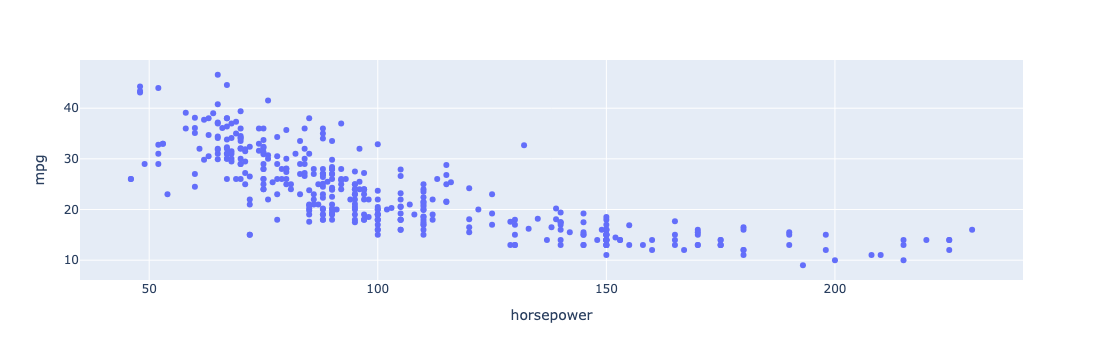

In [56]:
px.scatter(auto, y = 'mpg', x = 'horsepower')

In [7]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 27.7+ KB


## Problem 1

### Regression with `horsepower`

Complete the code below according to the isntructions below:

- Assign the `horsepower` column from the `auto` dataframe to the `X` variable.
- Assign the `mpg` column from the `auto` dataframe to the `y` variable.
- Instantiate and fit an sklearn `LinearRegression` model to predict `mpg` using the `horsepower` column. Assign this model to the variable `first_degree_model` below.  
- Calculate the model mean squared error between `first_degree_model.predict(X)` and `y` and assign it to the variable `first_degree_mse` below.  

In [57]:
X = auto[['horsepower']]
y = auto['mpg']
first_degree_model = LinearRegression().fit(X,y)
first_degree_model

LinearRegression()

In [58]:
first_degree_mse = mean_squared_error(first_degree_model.predict(X),y)
first_degree_mse

23.943662938603104

## Problem 2

### Creating quadratic feature

To build a second degree or quadratic model, you will first add a new column to the data based on squaring the `horsepower` column.  Assign these new values to the new column with name `hp2` below. 

In [59]:
auto['hp2'] = auto['horsepower']**2
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


## Problem 3

### Building a quadratic model

Complete the code below according to the isntructions below:

- Assign the `horsepower` and `hp2` columns from the `auto` dataframe to the `X` variable.
- Assign the `mpg` column from the `auto` dataframe to the `y` variable.
- Instantiate an sklearn `LinearRegression` model and use the `fit` function to train your model using `X` and `y`. Assign this model to the variable `quadratic_model` below.  
- Calculate the model mean squared error between `first_degree_model.predict(X)` and `y` and assign it to the variable `quad_mse` below. 

In [71]:
X = auto[['horsepower','hp2']]
y = auto['mpg']
quadratic_model = LinearRegression().fit(X,y)
quadratic_model

LinearRegression()

In [13]:
quad_mse = mean_squared_error(quadratic_model.predict(X),y)
print(quadratic_model.coef_)
print(quadratic_model.intercept_)
quad_mse

[-0.46618963  0.00123054]
56.900099702113124


18.98476890761722

## Problem 4

### Plotting Predictions

Because our data is not ordered by horsepower, a lineplot of `.predict(X)` would not be sensible.  To plot the correct predictions for your quadratic model, use the `sort_values()` function on `auto[['horsepower', 'hp2']]`  to sort the two features by the `horsepower` column. 

Assign this as a DataFrame to `x_for_pred` below.  

Note that the resulting DataFrame should start with:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>horsepower</th>      <th>hp2</th>    </tr>  </thead>  <tbody>    <tr>      <th>19</th>      <td>46.0</td>      <td>2116.0</td>    </tr>    <tr>      <th>101</th>      <td>46.0</td>      <td>2116.0</td>    </tr>    <tr>      <th>324</th>      <td>48.0</td>      <td>2304.0</td>    </tr>    <tr>      <th>323</th>      <td>48.0</td>      <td>2304.0</td>    </tr>    <tr>      <th>242</th>      <td>48.0</td>      <td>2304.0</td>    </tr>  </tbody></table>

In [14]:
x_for_pred = auto[['horsepower','hp2']].sort_values('horsepower')
x_for_pred.head()

,horsepower,hp2
19,46.0,2116.0
101,46.0,2116.0
324,48.0,2304.0
323,48.0,2304.0
242,48.0,2304.0


<Axes: xlabel='horsepower'>

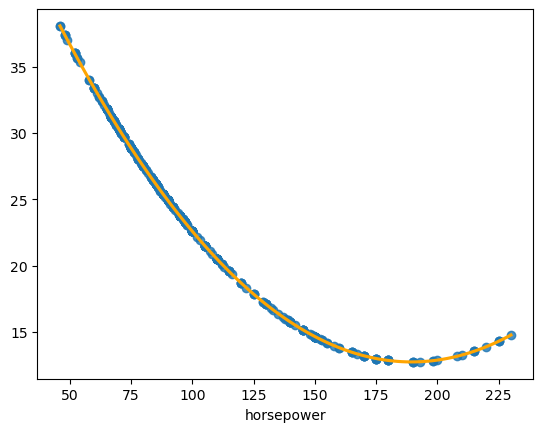

In [37]:
sns.regplot(x = auto['horsepower'] ,y= quadratic_model.predict(X), order = 2,line_kws = {'color': 'orange'})

<Axes: xlabel='horsepower', ylabel='mpg'>

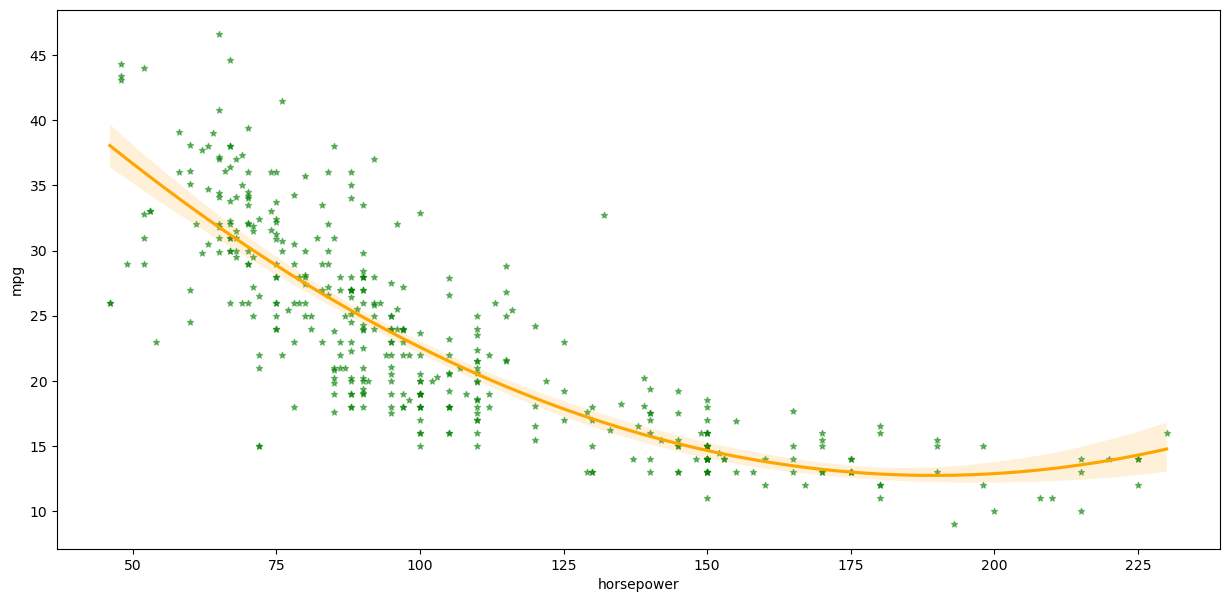

In [93]:
# sns.regplot: regression plot
# 2 subplots: line_kws controls the line properties
# scatter_kws contains 's' (size), 'alpha' (transparence)
fig, ax = plt.subplots(figsize= (15, 7))
sns.regplot(auto, y = 'mpg', x = 'horsepower', order = 2, marker = '*', color = 'green', line_kws = {'color': 'orange'}, scatter_kws = {'s': 20, 'alpha': 0.5})

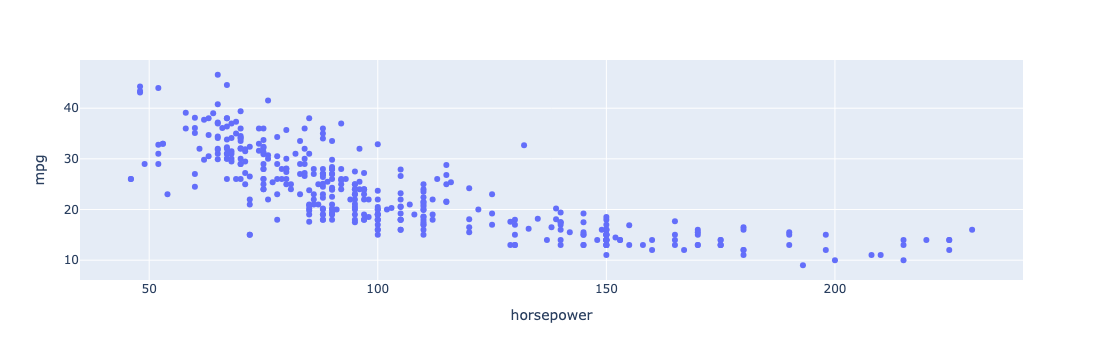

In [52]:
px.scatter(auto, y = 'mpg', x = 'horsepower')

In [72]:
new_df = auto[["horsepower",  "hp2", "mpg"]]
new_df["1d_mpg"] = first_degree_model.predict(auto[['horsepower']])
new_df["2d_mpg"] = quadratic_model.predict(X)
new_df


/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1094/3278470200.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1094/3278470200.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,horsepower,hp2,mpg,1d_mpg,2d_mpg
0,130.0,16900.0,18.0,19.416046,17.091508
1,165.0,27225.0,15.0,13.891480,13.480156
2,150.0,22500.0,18.0,16.259151,14.658717
3,150.0,22500.0,16.0,16.259151,14.658717
4,140.0,19600.0,17.0,17.837598,15.752059
...,...,...,...,...,...
387,86.0,7396.0,27.0,26.361214,25.908837
388,52.0,2704.0,44.0,31.727935,35.985609
389,84.0,7056.0,32.0,26.676903,26.422834
390,79.0,6241.0,28.0,27.466127,27.750895


In [90]:
new_df[new_df["horsepower"]==150]

,horsepower,hp2,mpg,1d_mpg,2d_mpg
2,150.0,22500.0,18.0,16.259151,14.658717
3,150.0,22500.0,16.0,16.259151,14.658717
12,150.0,22500.0,15.0,16.259151,14.658717
40,150.0,22500.0,14.0,16.259151,14.658717
63,150.0,22500.0,15.0,16.259151,14.658717
65,150.0,22500.0,17.0,16.259151,14.658717
71,150.0,22500.0,15.0,16.259151,14.658717
74,150.0,22500.0,14.0,16.259151,14.658717
85,150.0,22500.0,14.0,16.259151,14.658717
88,150.0,22500.0,15.0,16.259151,14.658717


In [79]:
import plotly.graph_objects as go

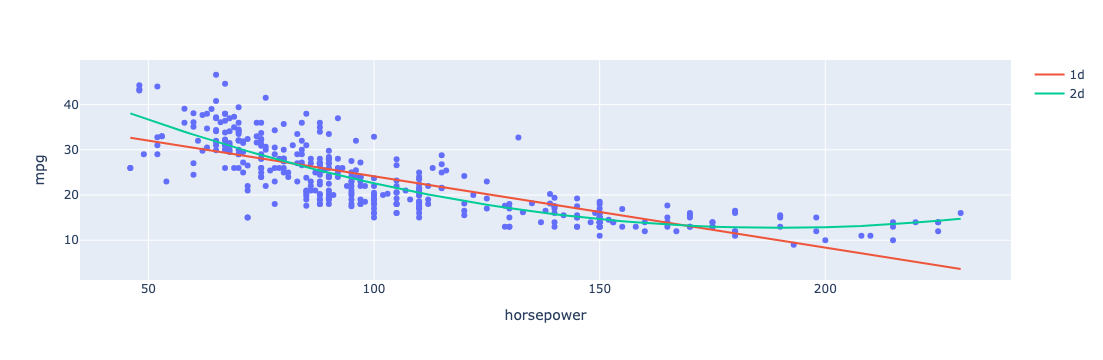

In [92]:
fig = px.scatter(auto, y = 'mpg', x = 'horsepower')
fig.add_trace(go.Scatter(x= new_df["horsepower"], y = new_df["1d_mpg"], mode="lines", name = "1d"))
fig.add_trace(go.Scatter(x= new_df.sort_values("horsepower")["horsepower"], y = new_df.sort_values("horsepower")["2d_mpg"], mode="lines", name = "2d"))
#px.line(new_df, x= "horsepower", y = "1d_mpg")

## Problem 5

### Comparing the model performance

Reflect on the mean squared error of the two models.  Which model more closely approximated the data -- linear or quadratic?  Assign your answer as a string to `best_model` below (`linear` or `quadratic`).  

In [15]:
best_model = 'quadratic'

## Codio Exercise 8.2: Using `PolynomialFeatures`

This activity focuses on using the scikit-learn transformer `PolynomialFeatures`.  As seen in video 8.4, you can use this transformer to create the modified DataFrame with appropriate column names using the `.get_feature_names_out()` method on the fit transformer.  You will focus on building second, third, and fourth degree polynomial models using `PolynomialFeatures`, and converting the results to pandas DataFrames.

## Index:

 - [Problem 1](#Problem-1)
 - [Problem 2](#Problem-2)
 - [Problem 3](#Problem-3)
 - [Problem 4](#Problem-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer

### The Data

Again, the automobile dataset is used.  You will build the additional features using the `horsepower` column of the data.  

In [3]:
auto = pd.read_csv('codio_8_2_solution/data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Problem 1

### Creating Quadratic Features

Complete the code below according to the instructions below:

- Instantiate a `PolynomialFeatures()` transformer and assign it to the variable `pfeatures`.
- Apply the transformation to the `horsepower` column by applying the `fit_transform` function with argument equal to `auto[['horsepower']]` on `pfeatures`. Assign your result to `quad_features` below.

In [3]:
pfeatures = PolynomialFeatures()

In [5]:
qual_features = pfeatures.fit_transform(auto[['horsepower']])
qual_features

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]], shape=(392, 3))

## Problem 2

### Creating the DataFrame

Use the transformed array `quad_features` to create a DataFrame of the transformed data.  As shown in the lectures, use the `get_feature_names_out()` method of your fit transformer `pfeatures` from above to define the column names.  Use `iloc[:, 1:]` to drop the bias term from the DataFrame so that you only have the columns `horsepower` and `horsepower^2`.  

Assign your response as a DataFrame to the variable `poly_features_df` below.

In [7]:
columns = pfeatures.get_feature_names_out()
columns

array(['1', 'horsepower', 'horsepower^2'], dtype=object)

In [9]:
poly_features_df = pd.DataFrame(qual_features,columns = pfeatures.get_feature_names_out()).iloc[:,1:]
poly_features_df


,horsepower,horsepower^2
0,130.0,16900.0
1,165.0,27225.0
2,150.0,22500.0
3,150.0,22500.0
4,140.0,19600.0
...,...,...
387,86.0,7396.0
388,52.0,2704.0
389,84.0,7056.0
390,79.0,6241.0


## Problem 3

### DataFrame with Cubic Features

Complete the code below according to the instructions below:

- Instantiate a `PolynomialFeatures()` transformer with `degree` equal to `3` and assign it to the variable `pfeatures`.
- Apply the transformation to the `horsepower` column by applying the `fit_transform` function with argument equal to `auto[['horsepower']]` on `pfeatures`. Assign your result to `cubic_features` below.
- Use the transformed array `cubic_features` to create a DataFrame of the transformed data.  As shown in the lectures, use the `get_feature_names_out()` method of your fit transformer `pfeatures` from above to define the column names.  Use `iloc[:, 1:]` to drop the bias term from the DataFrame so that you only have the columns `horsepower`,`horsepower^2`, and `horsepower^3`.  

Assign your response as a DataFrame to the variable `cubic_features_df` below.

In [10]:
pfeatures = PolynomialFeatures(degree = 3)

In [12]:
cubic_features = pfeatures.fit_transform(auto[['horsepower']])

In [15]:
cubic_features_df= pd.DataFrame(cubic_features, columns = pfeatures.get_feature_names_out()).iloc[:, 1:]
cubic_features_df

,horsepower,horsepower^2,horsepower^3
0,130.0,16900.0,2197000.0
1,165.0,27225.0,4492125.0
2,150.0,22500.0,3375000.0
3,150.0,22500.0,3375000.0
4,140.0,19600.0,2744000.0
...,...,...,...
387,86.0,7396.0,636056.0
388,52.0,2704.0,140608.0
389,84.0,7056.0,592704.0
390,79.0,6241.0,493039.0


## Problem 4

### Experimenting with Multiple Features

Complete the code below according to the instructions below:

- Instantiate a `PolynomialFeatures()` transformer with `degree` equal to `2` and assign it to the variable `pfeatures`.
- Apply the transformation to the `horsepower` and `weight` columns by applying the `fit_transform` function with argument equal to `auto[['horsepower', 'weight']]` on `pfeatures`. Assign your result to `two_features` below.
- Use the transformed array `two_features` to create a DataFrame of the transformed data.  As shown in the lectures, use the `get_feature_names_out()` method of your fit transformer `pfeatures` from above to define the column names.  Use `iloc[:, 1:]` to drop the bias term from the DataFrame.

Assign your response as a DataFrame to the variable `two_feature_poly_df` below.

In [16]:
pfeatures = PolynomialFeatures(degree = 2)

In [17]:
two_features = pfeatures.fit_transform(auto[['horsepower','weight']])

In [18]:
two_feature_poly_df = pd.DataFrame(two_features, columns = pfeatures.get_feature_names_out()).iloc[:, 1:]
two_feature_poly_df.head()

,horsepower,weight,horsepower^2,horsepower weight,weight^2
0,130.0,3504.0,16900.0,455520.0,12278016.0
1,165.0,3693.0,27225.0,609345.0,13638249.0
2,150.0,3436.0,22500.0,515400.0,11806096.0
3,150.0,3433.0,22500.0,514950.0,11785489.0
4,140.0,3449.0,19600.0,482860.0,11895601.0


#### Summary

Now that you have the hang of using `PolynomialFeatures`, you will combine the transformer with an estimator using scikitlearn's pipeline utilities.  As demonstrated in the videos, the pipeline is a handy abstraction for combining the data transformations with the model in a single object.  This is especially handy when making predictions with new data points.

## Codio Activity 8.3: Scikit-Learn Pipelines

This activity focuses on using the pipeline functionality of scikit-learn to combine a transformer with an estimator.  Specifically, you will combine the process of generating polynomial features with that of building a linear regression model.  You will use the `Pipeline` functionality from the `sklearn.pipeline` module to construct both a quadratic and cubic model.

## Index:

 - [Problem 1](#Problem-1)
 - [Problem 2](#Problem-2)
 - [Problem 3](#Problem-3)
 - [Problem 4](#Problem-4)
 - [Problem 5](#Problem-5)
 - [Problem 6](#Problem-6)

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

### The Data

The data will again be the automobile dataset.  You are to use the pipelines to build quadratic features and linear models using `horsepower` to predict `mpg`.   

In [4]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Problem 1

### Creating a `Pipeline`

Use `Pipeline` to create a pipeline object. Inside the pipeline object define a a tuple where the first element is a string identifier `quad_features` and the second element is an instance of `PolynomialFeatures` of degree `2`. Inside the pipeline define another tuple where the first element is a string identifier `quad_model`, and the second element is an instance of `LinearRegression`. Assign the pipeline object to the variable `pipe`.

In [6]:
pipe = Pipeline([('quad_features',PolynomialFeatures(degree = 2)),('quad_model',LinearRegression())])
pipe

Pipeline(steps=[('quad_features', PolynomialFeatures()),
                ('quad_model', LinearRegression())])

In [7]:
type(pipe)

sklearn.pipeline.Pipeline

In [8]:
pipe.named_steps

{'quad_features': PolynomialFeatures(), 'quad_model': LinearRegression()}

## Problem 2

### Fitting the Pipeline

Complete the code below according to the following instructions:

- Assign to the variable `X` the values of the `horsepower` of `auto`.
- Assign to the variable `y` the values of the `mpg` of `auto`.
- Use the function `fit` on `pipe` to train your model on `X` and `y`.
- Determine the `mean_squared_error` of your model, and assign the value as a float to `quad_pipe_mse` below.  

In [9]:
X = auto[['horsepower']]
y = auto['mpg']


In [10]:
pipe.fit(X,y)

Pipeline(steps=[('quad_features', PolynomialFeatures()),
                ('quad_model', LinearRegression())])

In [11]:
quad_pipe_mse = mean_squared_error(pipe.predict(X), y)
quad_pipe_mse

18.98476890761722

## Problem 3

### Examining the Coefficients

Now, to examine the coefficients, use the `.named_steps` attribute on the `pipe` object to extract the regressor.  Assign the model to `quad_reg` below.  

Extract the coefficients from the model and assign these as an array to the variable `coefs`.

In [14]:
quad_reg = pipe.named_steps['quad_model']
quad_reg

LinearRegression()

In [15]:
coefs = quad_reg.coef_
coefs

array([ 0.        , -0.46618963,  0.00123054])

## Problem 4

### Considering the Bias 

Not that your coefficients have 3 values.  Your model also contains an intercept term though, and this leads to one more value than expected from a quadratic model with one input feature.  This is due to the inclusion of the bias term using `PolynomialFeatures` and the intercept term added with the `fit_intercept = True` default setting in the regressor.  


To get the appropriate model coefficients and intercept, you can set `include_bias = False` in the `PolynomialFeatures` transformer.  

Complete the code according to the instructions below:

- Use `Pipeline` to create a pipeline object. Inside the pipeline object define a a tuple where the first element is a string identifier `quad_features` and the second element is an instance of `PolynomialFeatures` of degree `2` with `include_bias = False`. Inside the pipeline define another tuple where the first element is a string identifier `quad_model`, and the second element is an instance of `LinearRegression`. Assign the pipeline object to the variable `pipe_no_bias`.
- Use the `fit` function on `pipe_no_bias` to train your model on `X` and `y`. 
- Use the `mean_squared_error` function to calculate the MSE between `y` and `pipe_no_bias.predict(X)`. Assign the result as a float `no_bias_mse`.

In [16]:
pipe_no_bias = Pipeline([('quad_features',PolynomialFeatures(degree =2, include_bias = False)), ('quad_model', LinearRegression())])
pipe_no_bias

Pipeline(steps=[('quad_features', PolynomialFeatures(include_bias=False)),
                ('quad_model', LinearRegression())])

In [17]:
pipe_no_bias.fit(X,y)

Pipeline(steps=[('quad_features', PolynomialFeatures(include_bias=False)),
                ('quad_model', LinearRegression())])

In [18]:
no_bias_mse = mean_squared_error(y,pipe_no_bias.predict(X))
no_bias_mse

18.98476890761722

## Problem 5

### Building a Cubic Model with `Pipeline`

Complete the code according to the instructions below:

- Use `Pipeline` to create a pipeline object. Inside the pipeline object define a a tuple where the first element is a string identifier `quad_features` and the second element is an instance of `PolynomialFeatures` of degree `3` with `include_bias = False`. Inside the pipeline define another tuple where the first element is a string identifier `quad_model`, and the second element is an instance of `LinearRegression`. Assign the pipeline object to the variable `cubic_pipe`.
- Use the `fit` function on `cubic_pipe` to train your model on `X` and `y`. 
- Use the `mean_squared_error` function to calculate the MSE between `y` and `cubic_pipe.predict(X)`. Assign the result as a float to `no_bias_mse`.


In [19]:
cubic_pipe = Pipeline([('quad_features',PolynomialFeatures(degree = 3, include_bias = False)),('quad_model',LinearRegression())])
cubic_pipe

Pipeline(steps=[('quad_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('quad_model', LinearRegression())])

In [20]:
cubic_pipe.fit(X,y)

Pipeline(steps=[('quad_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('quad_model', LinearRegression())])

In [21]:
no_bias_mse = mean_squared_error(y,cubic_pipe.predict(X))
no_bias_mse

18.94498981448592

## Problem 6

### Making Predictions on New Data

Finally, one of the main benefits derived from using a Pipeline is that you do not need to engineer new polynomial features when predicting with new data.  Use your cubic pipeline to predict the `mpg` for a vehicle with 200 horsepower.  Assign your prediction as a numpy array to `cube_predict` below.

In [23]:
cube_predict = cubic_pipe.predict(np.array([[200]]))
cube_predict

array([12.90220247])

## Codio Activity 8.4: Fitting Higher Order Polynomials

In this exercise, you will examine the effect of fitting more complex models on the automobile data.  Using the `Pipeline`, you will fit models degree 1 - 10 and evaluate the mean squared error of each model.  Using these results, you are to generate a plot of the model complexity vs. mse.  

#### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)


In [24]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Problem 1

#### Loop of Models

Complete the code below according to the instructions below:

- Assign the values in the `horsepower` column of `auto` to the variable `X` below.
- Assign the values in the `mpg` column of `auto` to the variable `y` below.

Use a `for` loop to loop over the values from one to ten. For each iteration `i`:

- Use `Pipeline` to create a pipeline object. Inside the pipeline object define a a tuple where the first element is a string identifier `quad_features` and the second element is an instance of `PolynomialFeatures` of degree `i` with `include_bias = False`. Inside the pipeline define another tuple where the first element is a string identifier `quad_model`, and the second element is an instance of `LinearRegression`. Assign the pipeline object to the variable `pipe`.
- Use the `fit` function on `pipe` to train your model on `X` and `y`. Assign the result to `preds`.
- Use the `mean_squared_error` function to calculate the MSE between `preds` and `y`. Assign the result to `mse`.
- Append each `mse` to the `mses`list.


In [26]:
X = auto[['horsepower']]
y = auto['mpg']

In [31]:
mses = []
for i in range(1,11):
    pipe = Pipeline([('quad_features',PolynomialFeatures(degree = i, include_bias = False)),('quad_model',LinearRegression())])
    pipe.fit(X,y)
    preds = pipe.predict(X)
    mse = mean_squared_error(y, preds)
    mses.append(mse)
print(np.round(mses,2))

[23.94 18.98 18.94 18.88 18.43 18.61 18.65 18.59 18.72 19.28]


### Problem 2

#### Minimum MSE

Which model complexity had the smallest Mean Squared Error?  Assign your answer as an integer to `best_complexity` below.  

In [32]:
best_complexity = mses.index(min(mses)) +1
best_complexity

5

### Codio Activity 8.5: Comparing Complexity and Variance

In this activity, you will explore the effect of model complexity on the variance in predictions.  Continuing with the automotive data, you will build models on a subset of 10 vehicles.  You will compare the model error when used on the entire dataset, and investigate how variance changes with model complexity.

#### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [4]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### The Sample

Below, a sample of ten vehicles from the data is extracted.  These data are what will form our **training** data.  The data is subsequently split into `X_train` and `y_train`.  You are to use this smaller dataset to build your models on, and explore their performance using the entire dataset.

In [5]:
X = auto.loc[:,['horsepower']]
y = auto['mpg']
sample = auto.sample(10, random_state = 22)
X_train = sample.loc[:, ['horsepower']]
y_train = sample['mpg']

In [6]:
X_train

,horsepower
280,88.0
57,80.0
46,100.0
223,110.0
303,90.0
73,140.0
98,100.0
250,105.0
254,100.0
337,110.0


In [7]:
y_train

280    22.3
57     25.0
46     19.0
223    17.5
303    28.4
73     13.0
98     18.0
250    19.2
254    20.5
337    23.5
Name: mpg, dtype: float64

In [8]:
X.shape

(392, 1)

### Problem 1

#### Iterate on Models

In this problem, you are to again build models using degree 1 through 10.  Use a `Pipeline` and be sure to set `include_bias = False` in your transformer.  Fit your pipelines on the training data, and assign the predictions using the entire dataset (`X`) to the appropriate key in the dictionary.`model_predictions`.

In [10]:
model_predictions = {}
for i in range(1,11):
    pipe = Pipeline([('quad_features',PolynomialFeatures(degree = i,include_bias = False)),('quad_model',LinearRegression())])
    pipe.fit(X_train,y_train)
    model_predictions[i] = pipe.predict(X)
print(model_predictions)

{1: array([14.90395265,  7.65623939, 10.76240222, 10.76240222, 12.83317743,
        0.82268118, -3.7330243 , -2.69763669, -4.7684119 ,  2.47930135,
        6.62085179,  8.691627  , 10.76240222, -4.7684119 , 22.15166591,
       22.15166591, 21.73751086, 24.22244112, 23.60120856, 32.29846447,
       23.80828608, 23.18705352, 22.15166591, 18.42427052, 23.18705352,
       -2.69763669,  0.40852614, -1.66224908,  1.85806879, 23.60120856,
       23.18705352, 22.15166591, 21.1162783 , 20.08089069, 21.1162783 ,
       23.60120856, 21.1162783 ,  7.65623939,  5.58546418, 10.14116965,
       10.76240222,  4.55007657,  6.62085179,  5.58546418, 19.04550308,
       26.91444891, 21.1162783 , 23.60120856, 24.0153636 , 23.18705352,
       27.32860395, 26.08613882, 28.36399156, 27.53568147, 29.39937916,
       27.32860395, 22.15166591, 25.25782873, 30.64184429, 23.18705352,
       24.0153636 ,  7.65623939,  5.58546418, 10.76240222, 10.14116965,
       10.76240222, -1.24809404,  9.72701461,  8.691627  ,  

In [11]:
# Professor's solution
# model_predictions = {f'degree_{i}': None for i in range(1, 11)}
# X = auto[['horsepower']]
# y = auto['mpg']
# for i in range(1, 11):
#     pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = False)), ('quad_model', LinearRegression())])
#     pipe.fit(X_train, y_train)
#     preds = pipe.predict(X)
#     model_predictions[f'degree_{i}'] = preds
# model_predictions['degree_1'][:10]

### Problem 2

#### DataFrame of Predictions

Use the `model_predictions` dictionary to create a DataFrame of the 10 models predictions.  Assign your solution to `pred_df` below as a DataFrame. 

In [12]:
pred_df = pd.DataFrame(model_predictions)
pred_df

,1,2,3,4,5,6,7,8,9,10
0,14.903953,14.959892,15.704485,32.550328,97.807186,101.893870,103.930124,103.117912,98.288549,87.834580
1,7.656239,9.465786,0.931088,-372.035448,-3456.142753,-4370.261809,-5342.158905,-6208.272375,-6618.868222,-5878.317829
2,10.762402,11.618435,9.428697,-61.767623,-516.945901,-606.286188,-688.535688,-746.836434,-752.165092,-655.407752
3,10.762402,11.618435,9.428697,-61.767623,-516.945901,-606.286188,-688.535688,-746.836434,-752.165092,-655.407752
4,12.833177,13.221841,13.121121,13.003201,12.998314,13.017510,12.998695,12.999480,12.999649,12.999760
...,...,...,...,...,...,...,...,...,...,...
387,24.015364,24.206911,24.085291,26.300682,24.380971,24.793614,25.128208,25.378131,25.563205,25.695265
388,31.055999,33.137736,42.866742,-228.756236,1163.630666,533.500930,230.105656,89.509196,28.309569,4.722812
389,24.429519,24.689167,24.695846,26.492402,23.841245,24.458844,24.935958,25.278327,25.518524,25.678236
390,25.464906,25.918370,26.429197,23.734701,26.103203,25.467010,25.027658,24.715740,24.504952,24.367057


### Problem 3

#### DataFrame of Errors

Now, determine the error for each model and create a DataFrame of these errors.  One way to do this is to use your prediction DataFrame's `.subtract` method to subtract `y` from each feature.  Assign the DataFrame of errors as `error_df` below.  

In [13]:
error_df = pred_df.subtract(y, axis = 0)
error_df.head()

,1,2,3,4,5,6,7,8,9,10
0,-3.096047,-3.040108,-2.295515,14.550328,79.807186,83.893870,85.930124,85.117912,80.288549,69.834580
1,-7.343761,-5.534214,-14.068912,-387.035448,-3471.142753,-4385.261809,-5357.158905,-6223.272375,-6633.868222,-5893.317829
2,-7.237598,-6.381565,-8.571303,-79.767623,-534.945901,-624.286188,-706.535688,-764.836434,-770.165092,-673.407752
3,-5.237598,-4.381565,-6.571303,-77.767623,-532.945901,-622.286188,-704.535688,-762.836434,-768.165092,-671.407752
4,-4.166823,-3.778159,-3.878879,-3.996799,-4.001686,-3.982490,-4.001305,-4.000520,-4.000351,-4.000240


### Problem 4

#### Mean and Variance of Model Errors

Using the DataFrame of errors, examine the mean and variance of each model's error.  What degree model has the highest variance?  Assign your response as an integer to `highest_var_degree` below.

In [14]:
error_mean = error_df.mean()
error_mean

1        -3.255150
2        -2.443086
3        -5.171435
4      -284.193957
5     -3690.067989
6     -5859.242552
7     -8936.187828
8    -12877.325505
9    -16669.965018
10   -16414.936432
dtype: float64

In [15]:
error_var = error_df.var()
error_var

1     2.759603e+01
2     2.130218e+01
3     2.802803e+02
4     1.342830e+06
5     3.400395e+08
6     9.033197e+08
7     2.245145e+09
8     4.974414e+09
9     8.818495e+09
10    8.824739e+09
dtype: float64

In [16]:
highest_var_degree = 10

#### Boxplots of Errors by Degree

Below, uncomment the code to create boxplots for each degree model error.  This should demonstrate an important idea, that as model complexity grows so does the variance in predictions of unseen data. 

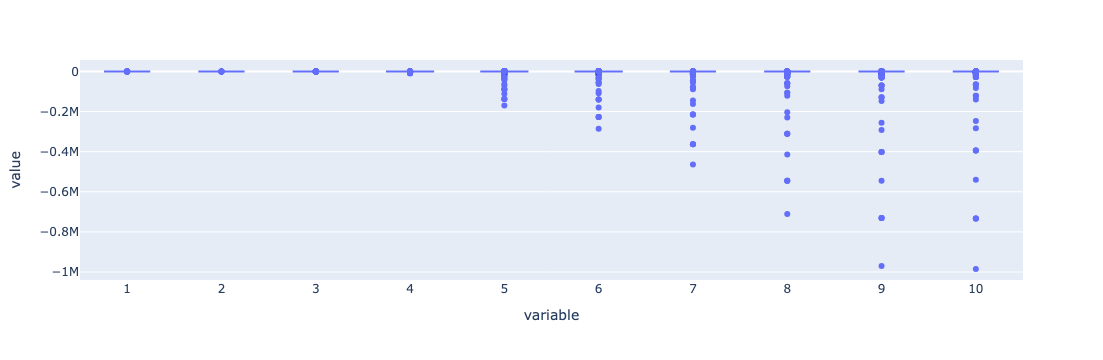

In [20]:
px.box(error_df)
